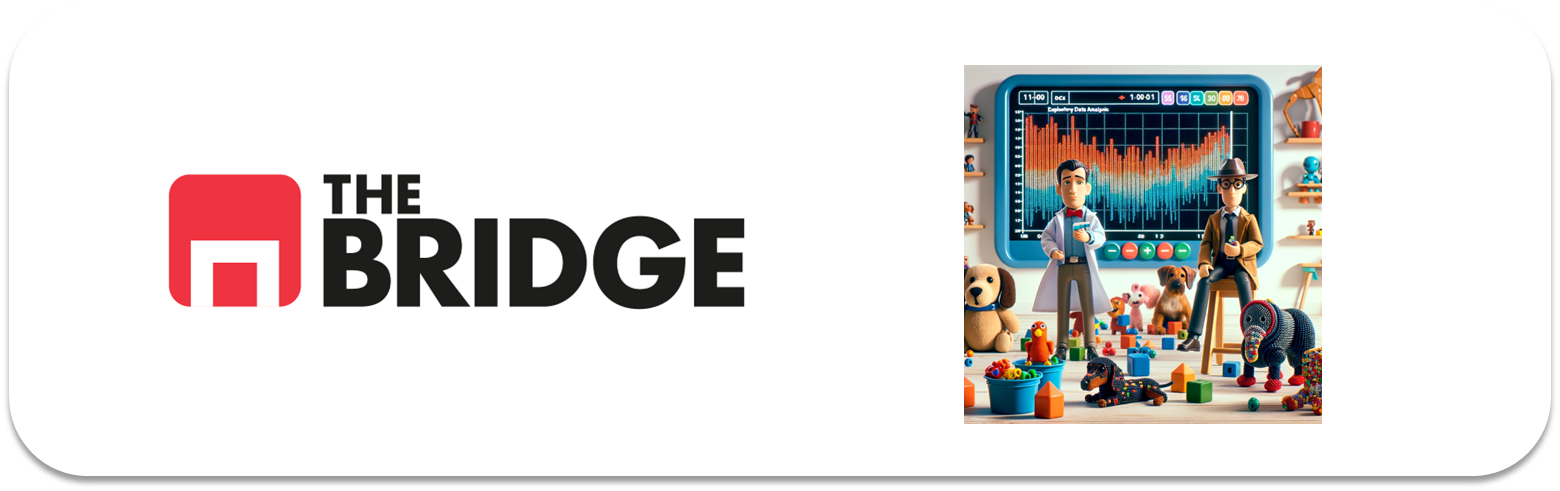

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df.drop(columns=["deck", "survived", "pclass","embarked"],inplace=True)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df['family_members'] = df['parch'] + df['sibsp']

df.drop(columns=['parch', 'sibsp'], inplace=True)

df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
moda_embark = df['embark_town'].mode()[0]

df.fillna({'embark_town': moda_embark}, inplace=True)

df['embark_town'].isna().sum()


np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
df['age'] = df.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))

df['age'].isna().sum()

np.int64(0)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

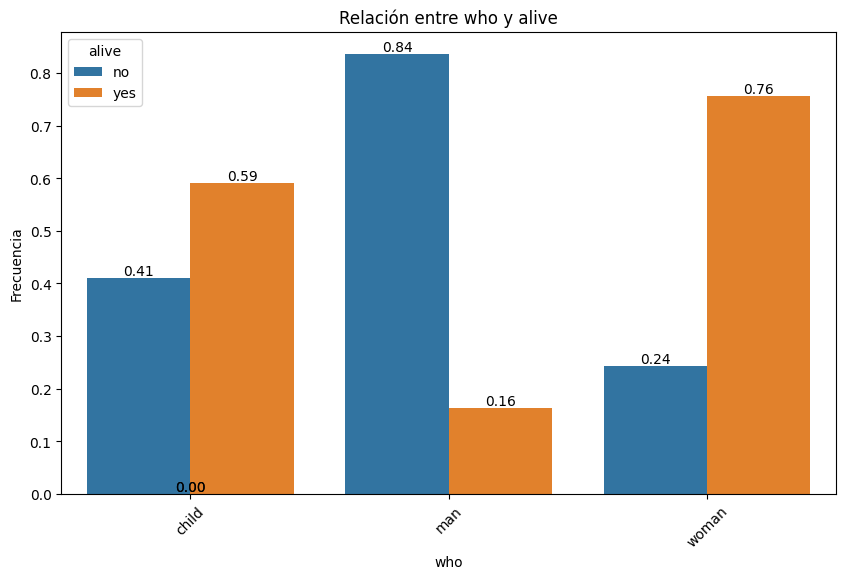

In [7]:
#Sobrevivientes Relativos
plot_categorical_relationship_fin(df, "who","alive", show_values= True, relative_freq = True)

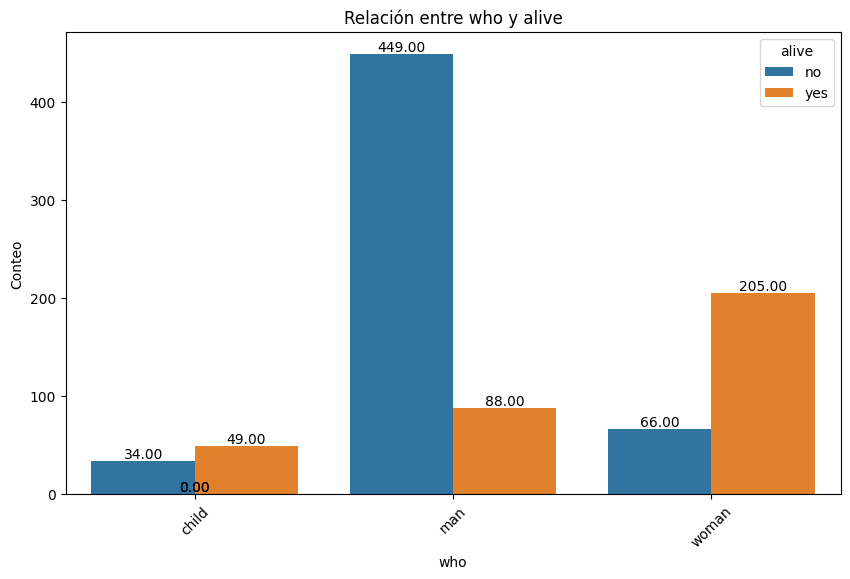

In [8]:
#Cantidad de sobrevivientes absolutos
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

In [9]:
tabla_contingencia = pd.crosstab(df['alive'], df['who'])

tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [10]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [11]:
tabla_contingencia2 = pd.crosstab(df['alive'], df['sex'])

tabla_contingencia2

sex,female,male
alive,,
no,81,468
yes,233,109


In [12]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


Existe una relacion estadistica significativa entre el sexo y la supervivencia en el tianic y tambien entre si se es ninio o adulto y la supervivencia. Es decir, siendo ninio, hubieras tenido mas chances de sobrevivir, o mujer. Al hacer la prueba de chi2, nos da un valor p muy inferior a 0.05, lo que nos indica la relacion estadistica significativa entre las variables.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

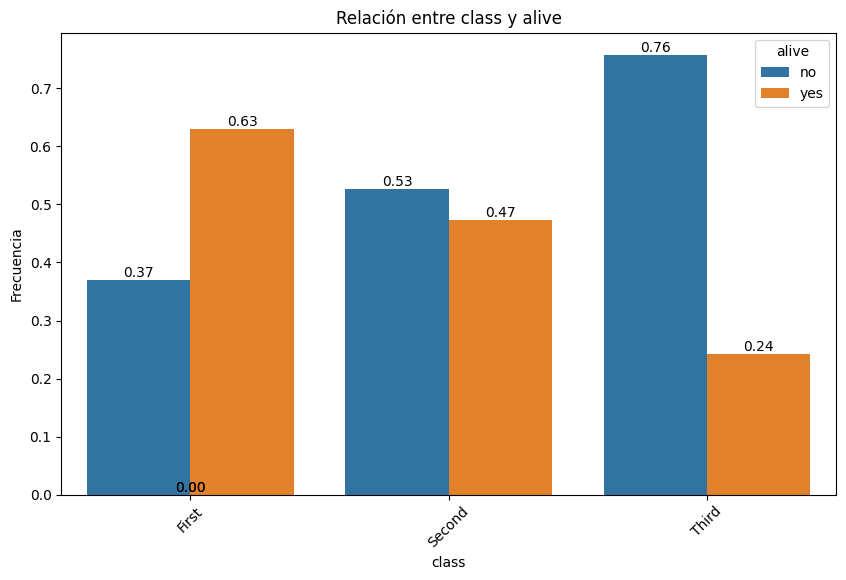

In [13]:
#Sobrevivientes por Clase Relativos
plot_categorical_relationship_fin(df, "class","alive", show_values= True, relative_freq = True)

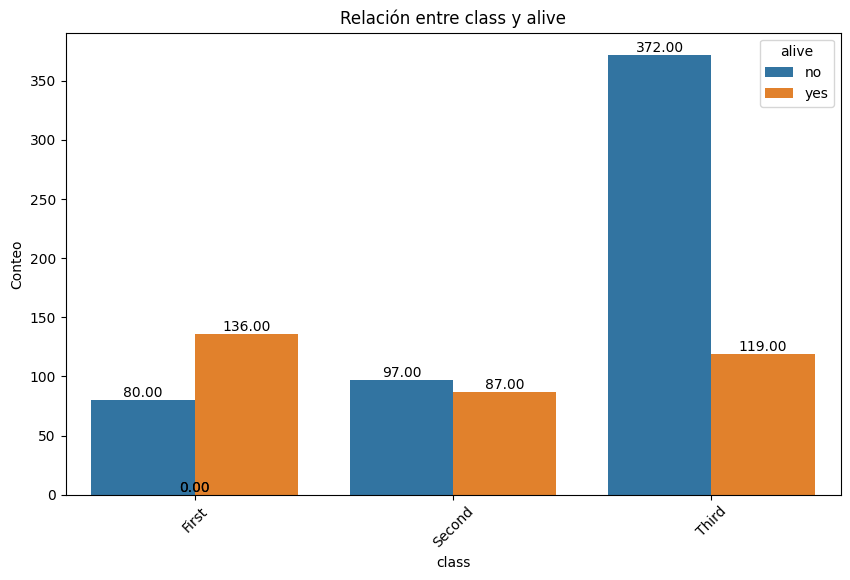

In [14]:
#Sobrevivientes por Clase Absolutos
plot_categorical_relationship_fin(df, "class","alive", show_values= True)

In [15]:
tabla_contingencia3 = pd.crosstab(df['alive'], df['class'])

tabla_contingencia3

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [16]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia3)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Existe una relacion estadistica significativa entre la clase en la que se viajaba y la supervivencia. 

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

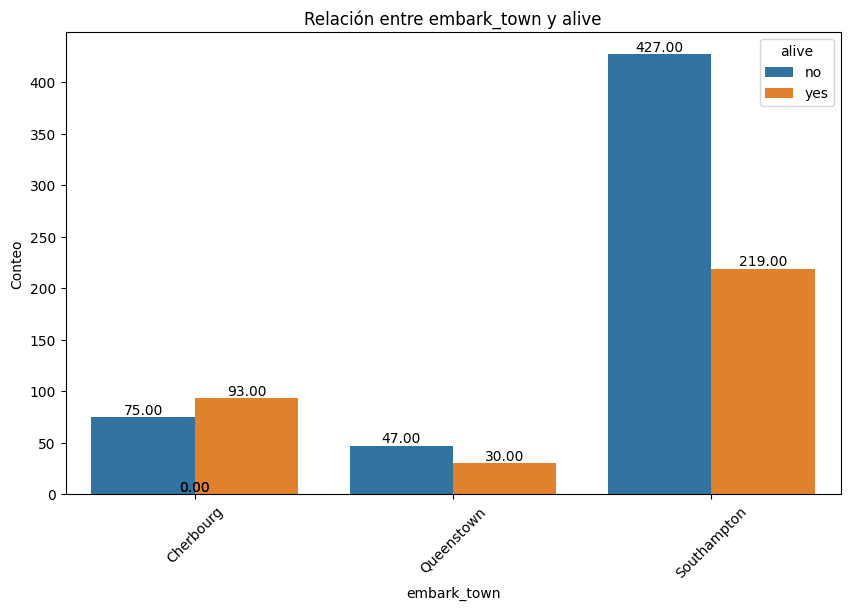

In [17]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True)

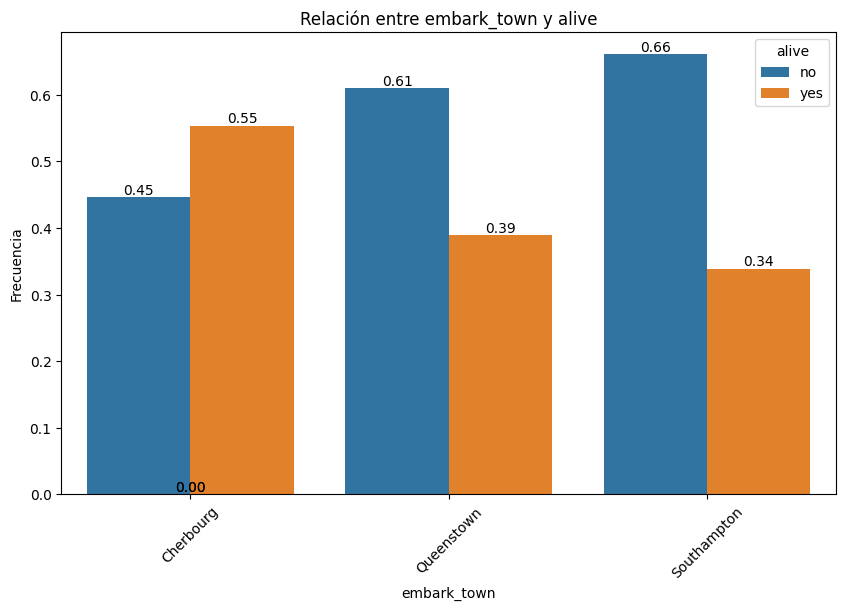

In [18]:
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True, relative_freq=True)

In [19]:
tabla_contingencia4 = pd.crosstab(df['alive'], df['class'])

tabla_contingencia4

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia4)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Sobrevivieron mas personas de Southampton. Porcentualmente sobrevivieron mas personas de Cherbourg. Hay una relacion estadistica significativa en haber embarcado en cada ciudad. Porcentualmente sobrevivieron mas los de Cherbourg, luego los de Queenstown y luego los de Southampton.











4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


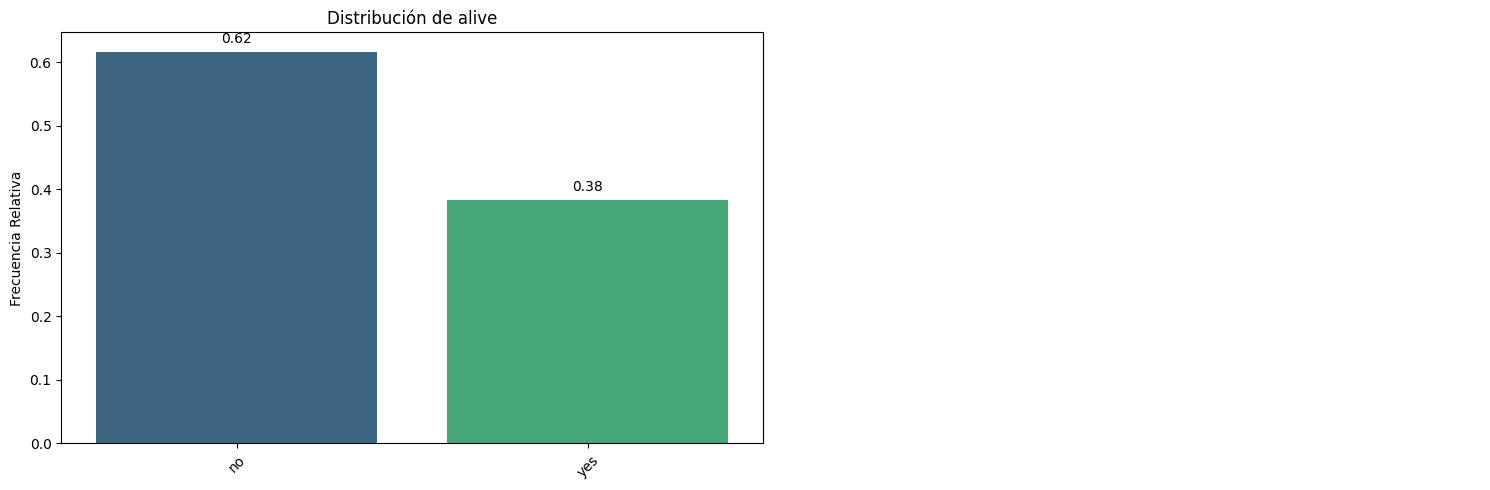

In [21]:
#Planteo la distribucion de valores de cada variante por separado
pinta_distribucion_categoricas(df,["alive"], relativa= True, mostrar_valores= True)

(2,)


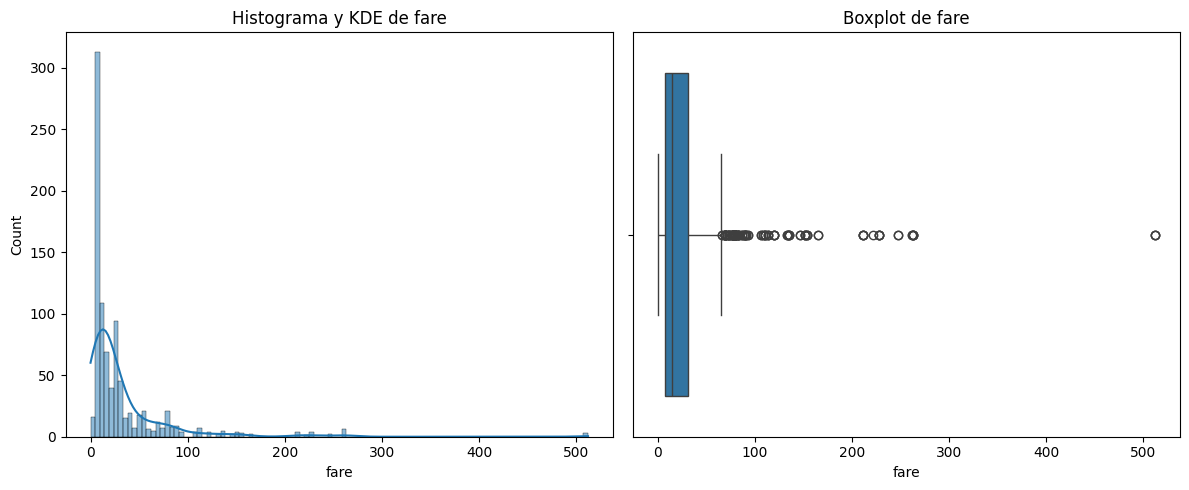

In [22]:
plot_combined_graphs(df,["fare"])

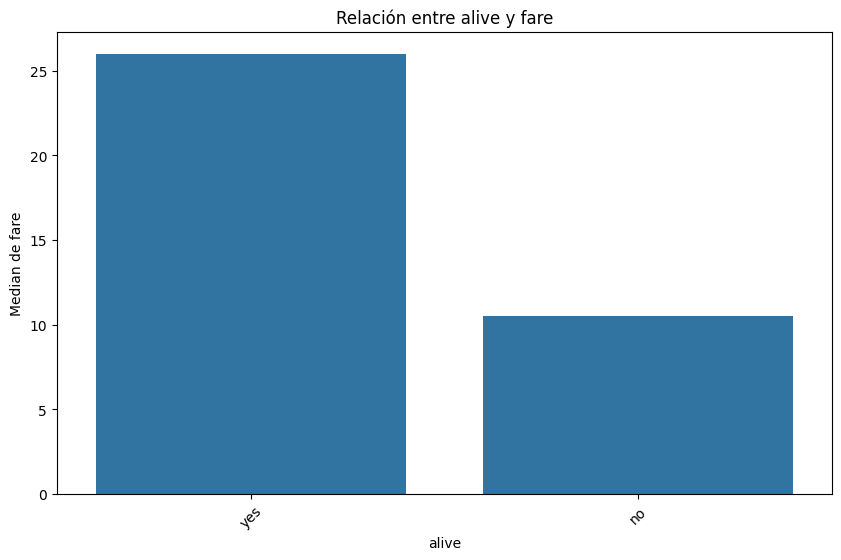

In [23]:
#2Muestro diferentes medidas de la variable numérica en función de los valores de la categórica.
plot_categorical_numerical_relationship(df,"alive","fare", measure = "median")

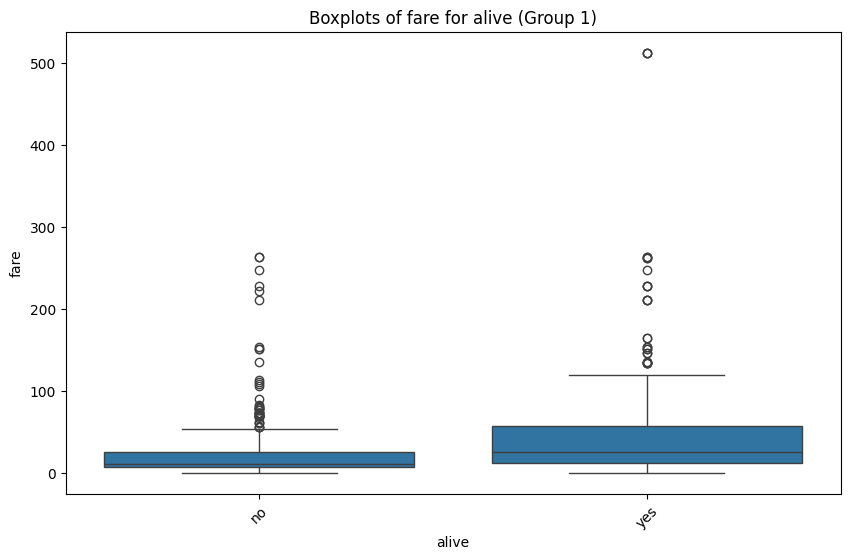

In [24]:
#Muestro diferentes medidas de la variable numerica funcion de la variable categorica
plot_grouped_boxplots(df,"alive","fare")

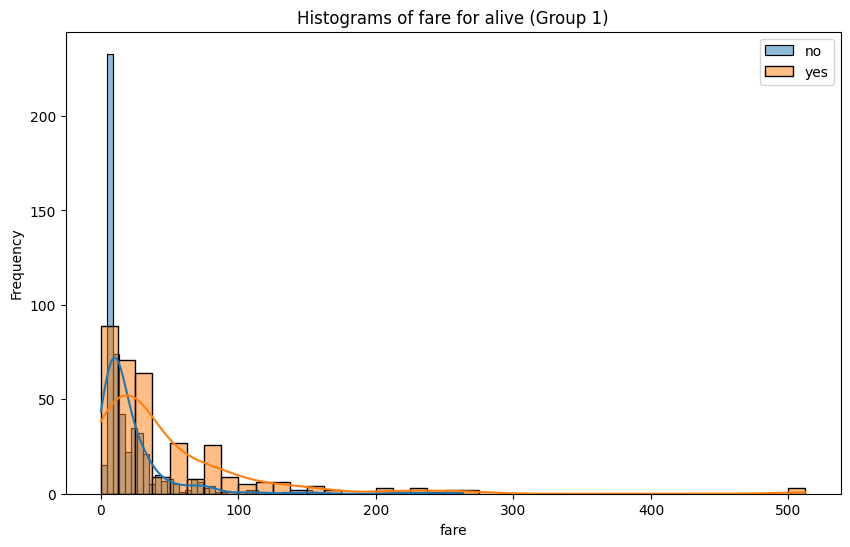

In [25]:
plot_grouped_histograms(df,"alive", "fare",2)

In [26]:
from scipy.stats import mannwhitneyu # Sí, de scipy.stats :-)

In [27]:
grupo_a = df.loc[df['alive'] == "yes"]["fare"]
grupo_b = df.loc[df['alive'] == "no"]["fare"]

In [28]:

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250238e-22


Todo indica que hay una relacion estadistica significativa entre el precio del ticket y la supervivencia. Los sobrevivientes pagaron mucho mas caro los tickets que los que no sobrevivieron. 

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?




In [29]:
pasajeros_gratis = df[df['fare'] == 0]
print(pasajeros_gratis)

      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  

In [30]:
pasajero_mas_caro = df[df['fare'] == df['fare'].max()]
print(pasajero_mas_caro)

        sex   age      fare  class    who  adult_male embark_town alive  \
258  female  35.0  512.3292  First  woman       False   Cherbourg   yes   
679    male  36.0  512.3292  First    man        True   Cherbourg   yes   
737    male  35.0  512.3292  First    man        True   Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0  


Puede ser que no se hayan registrado bien los datos, ya que no parecen ser ninios que les hayan pagado el ticket o empleados del barco. Y con respecto a los que mas pagaron por el billete, son personas 3 personas, dos de ellas viajaban solas. Un hombre con un miembro de la familia, y luego una mujer y otro hombres solos. Uno de los hombres de 36 anios, luego los demas de 35. Puede que hayan sido miembros vip del barco, personas conocidas, los 3 sobrevivieron. 

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.



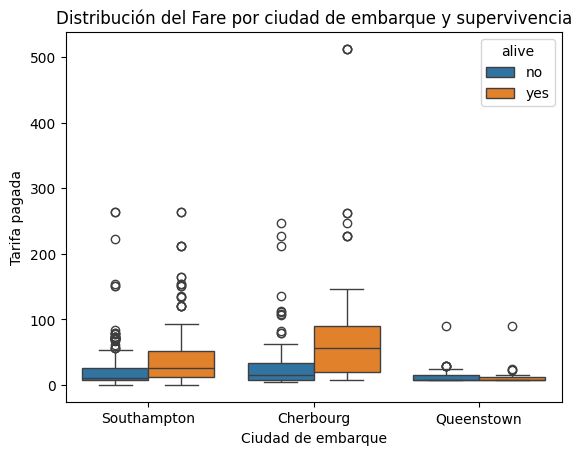

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='embark_town', y='fare', hue='alive')
plt.title('Distribución del Fare por ciudad de embarque y supervivencia')
plt.ylabel('Tarifa pagada')
plt.xlabel('Ciudad de embarque')
plt.show()

In [32]:
#Muestro el promedio de la tarifa pagada, segun la ciudad de embarque
df.groupby(['embark_town', 'alive'])['fare'].mean().round(2)

embark_town  alive
Cherbourg    no       35.44
             yes      79.72
Queenstown   no       13.34
             yes      13.18
Southampton  no       20.74
             yes      39.92
Name: fare, dtype: float64

In [33]:
df.groupby(['embark_town', 'alive']).size()

embark_town  alive
Cherbourg    no        75
             yes       93
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
dtype: int64

Los pasajeros que pagaron tarifas más altas, especialmente desde Cherbourg y Southampton, tuvieron mayores tasas de supervivencia, lo que probablemente se deba a que viajaban en clases superiores, con mejor acceso a botes salvavidas y asistencia.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?



In [42]:
#Agrupo las edades en rangos
bins = [0, 12, 18, 30, 50, 80]
labels = ['Niño', 'Adolescente', 'Joven adulto', 'Adulto', 'Mayor']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [ ]:
#Supervivencia en terminos absolutos
df[df['alive'] == 'yes'].groupby(['class', 'age_group']).size().sort_values(ascending=False)

/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_48029/488941779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['alive'] == 'yes'].groupby(['class', 'age_group']).size().sort_values(ascending=False)


class   age_group   
First   Adulto          72
Third   Adulto          49
        Joven adulto    36
Second  Adulto          33
First   Joven adulto    32
Second  Joven adulto    28
Third   Niño            20
First   Mayor           18
Second  Niño            17
Third   Adolescente     13
First   Adolescente     11
Second  Adolescente      6
First   Niño             3
Second  Mayor            3
Third   Mayor            1
dtype: int64

In [44]:
#Supervivencia en terminos relativos
grupo = df.groupby(['class', 'age_group'])['alive'].value_counts(normalize=True).unstack().fillna(0)
grupo['Supervivencia_relativa'] = (grupo['yes'] * 100).round(2)
grupo

/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_48029/493350972.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby(['class', 'age_group'])['alive'].value_counts(normalize=True).unstack().fillna(0)


alive                      no       yes  Supervivencia_relativa
class  age_group                                               
First  Niño          0.250000  0.750000                   75.00
       Adolescente   0.083333  0.916667                   91.67
       Joven adulto  0.288889  0.711111                   71.11
       Adulto        0.379310  0.620690                   62.07
       Mayor         0.538462  0.461538                   46.15
Second Niño          0.000000  1.000000                  100.00
       Adolescente   0.500000  0.500000                   50.00
       Joven adulto  0.582090  0.417910                   41.79
       Adulto        0.547945  0.452055                   45.21
       Mayor         0.800000  0.200000                   20.00
Third  Niño          0.583333  0.416667                   41.67
       Adolescente   0.717391  0.282609                   28.26
       Joven adulto  0.772152  0.227848                   22.78
       Adulto        0.786026  0.213974                   21.40
       Mayor         0.900000  0.100000                   10.00

En términos absolutos, el grupo que más sobrevivió fue el de jóvenes adultos de primera clase, seguido por adultos de primera clase y niños de tercera clase.

En términos relativos (porcentaje de supervivencia), los grupos con mayor supervivencia fueron:
Niños de segunda clase, con un 100% de supervivencia.
Adolescentes de primera clase, con un 91.67%.
Niños de primera clase, con un 75%.
Jóvenes adultos de primera clase, con un 71.11%.

Por el contrario, los grupos con menor supervivencia relativa fueron:
Mayores de tercera clase (solo un 10% sobrevivió),
Adultos y jóvenes adultos de tercera clase, con tasas de 21.40% y 22.78%, respectivamente.

Estos resultados confirman que la clase social fue un factor determinante en la supervivencia, donde los pasajeros de primera clase, incluso en edades adultas, tuvieron muchas más oportunidades de sobrevivir.
Asimismo, la edad también influyó: los niños y adolescentes presentaron tasas de supervivencia mucho más altas que los adultos o mayores, especialmente en primera y segunda clase. En tercera clase, sin embargo, incluso los más jóvenes enfrentaron tasas bajas, lo que refleja posiblemente un acceso más limitado a botes salvavidas y ayuda durante el hundimiento.



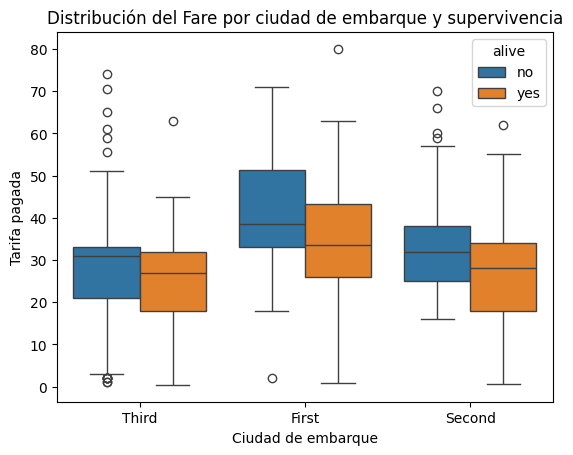

In [34]:
sns.boxplot(data=df, x='class', y='age', hue='alive')
plt.title('Distribución del Fare por ciudad de embarque y supervivencia')
plt.ylabel('Tarifa pagada')
plt.xlabel('Ciudad de embarque')
plt.show()

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

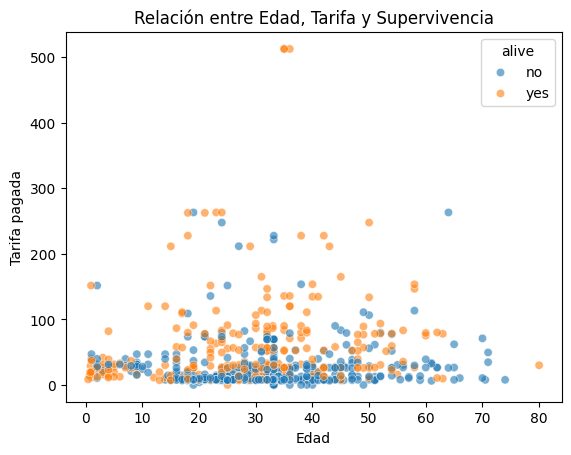

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='age', y='fare', hue='alive', alpha=0.6)
plt.title('Relación entre Edad, Tarifa y Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tarifa pagada')
plt.show()

Los pasajeros que pagaron tarifas más altas (principalmente de primera clase) tuvieron mayores tasas de supervivencia, independientemente de su edad. Muchos de ellos eran adultos y jóvenes adultos.
Los niños y adolescentes con tarifas medias o altas también presentan altas tasas de supervivencia, lo que refleja prioridad de rescate para los más jóvenes, especialmente si viajaban en clases altas.
Por otro lado, la mayoría de los pasajeros que pagaron tarifas bajas y que eran adultos o mayores tuvieron menos probabilidades de sobrevivir, en particular aquellos que embarcaron en tercera clase.
No hay una fuerte relación directa entre la edad y la tarifa (niños no necesariamente pagaron menos), pero sí hay una clara relación entre tarifa alta y mayor supervivencia.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [50]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


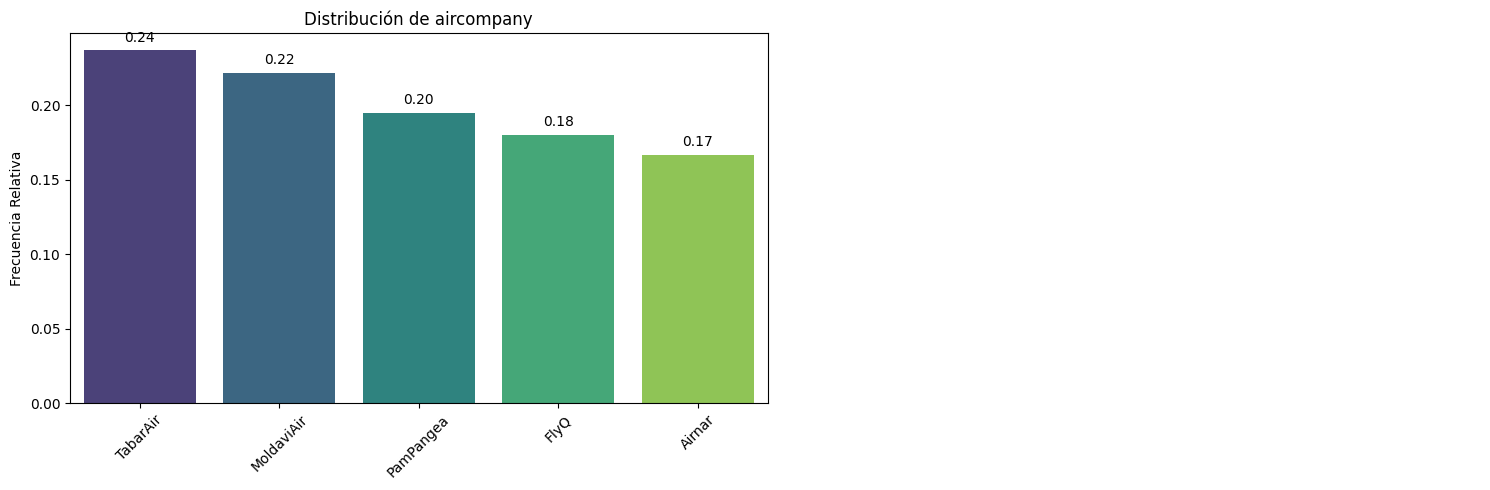

In [51]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

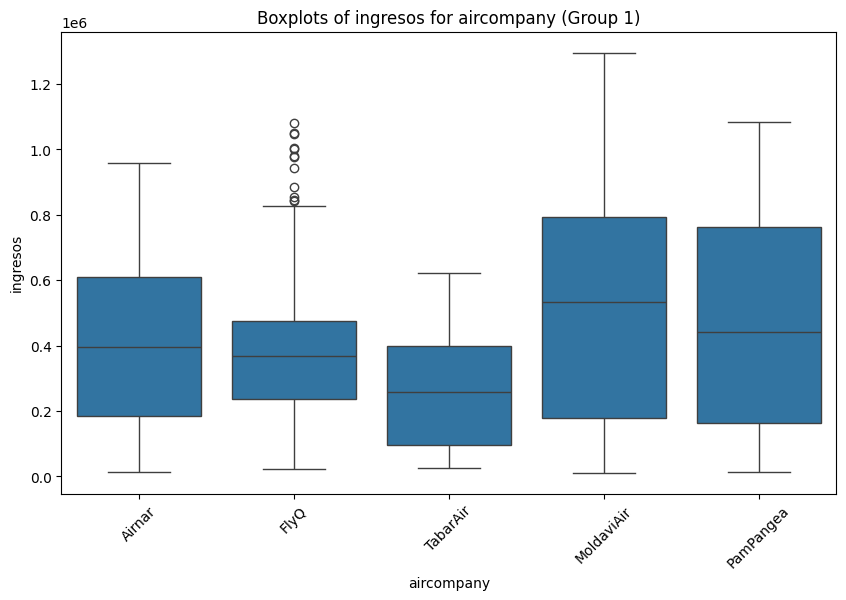

In [49]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

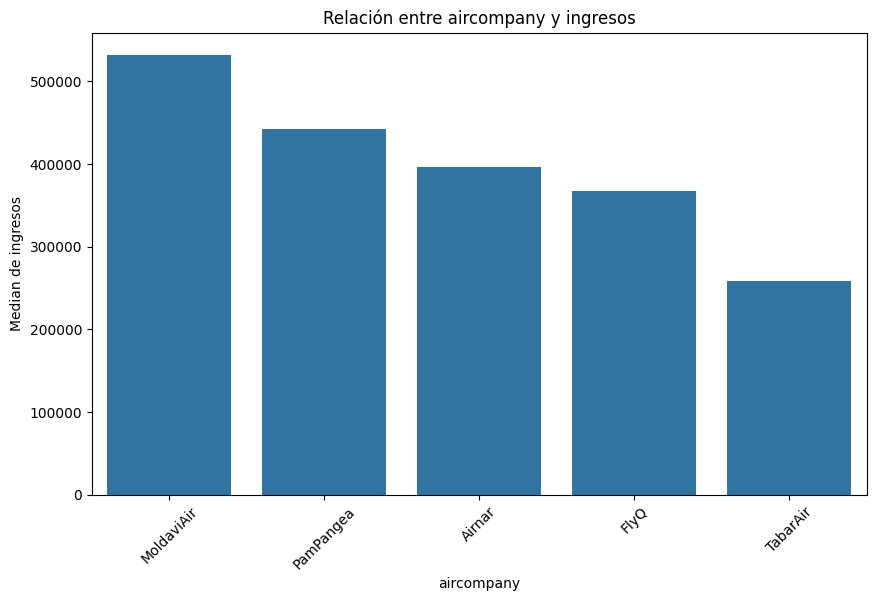

In [52]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana

TabarAir es la que mas viajes realiza pero la que menos ingresos medios tiene. 

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [53]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

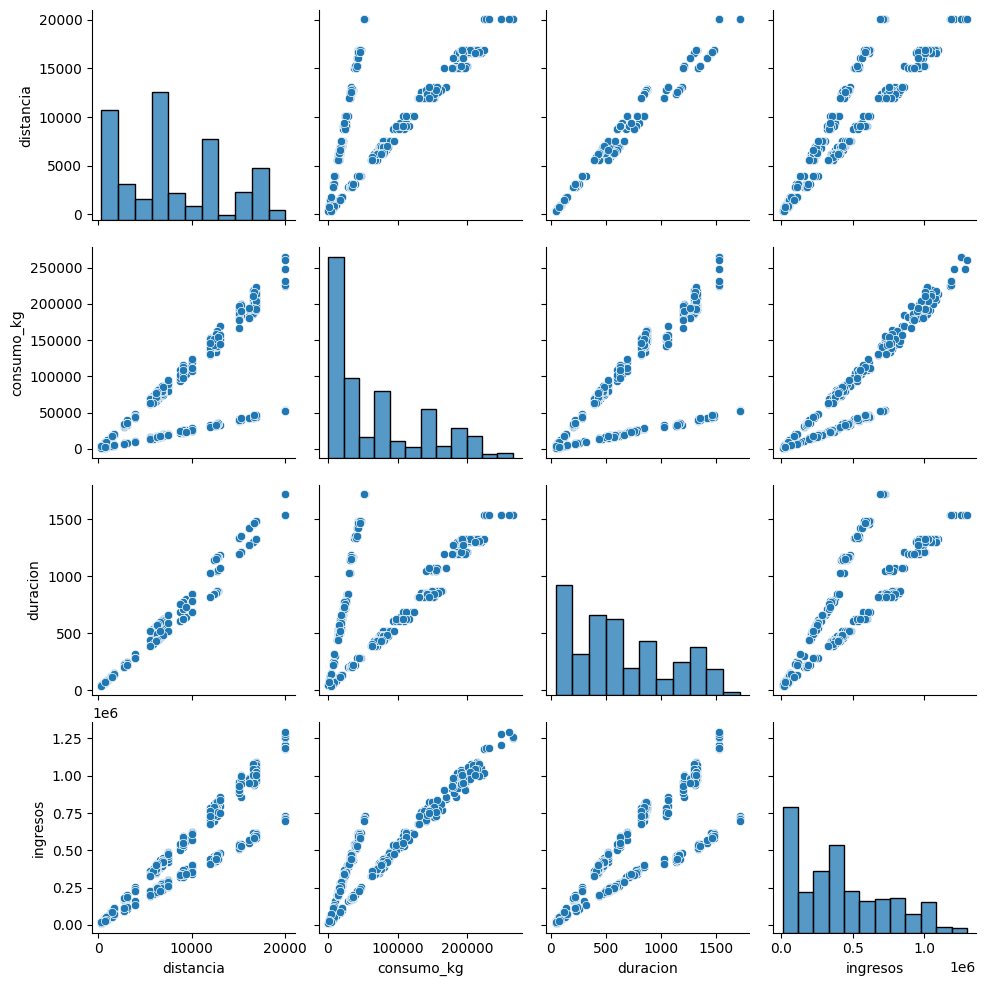

In [54]:
sns.pairplot(df_solo_numeros)
plt.show()

Veiamos que hay una linea de vuelos mucho mas eficientes. 

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [59]:
df_air_jun['distancia'].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [ ]:
bins = [0, 3073, 6877, 12553, 20029]  # Los límites de cada categoría
labels = ['Corta distancia', 'Media distancia', 'Larga distancia', 'Muy larga distancia']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels)


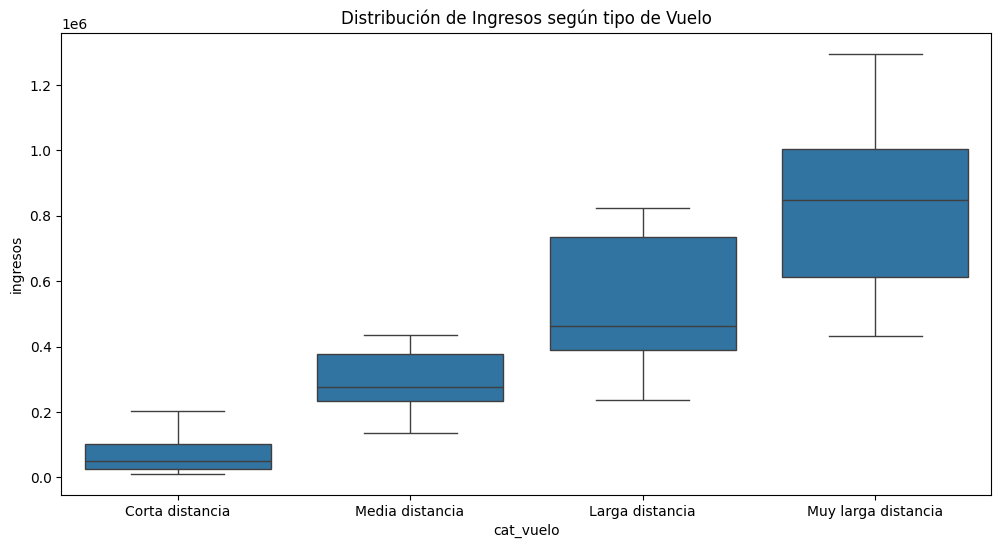

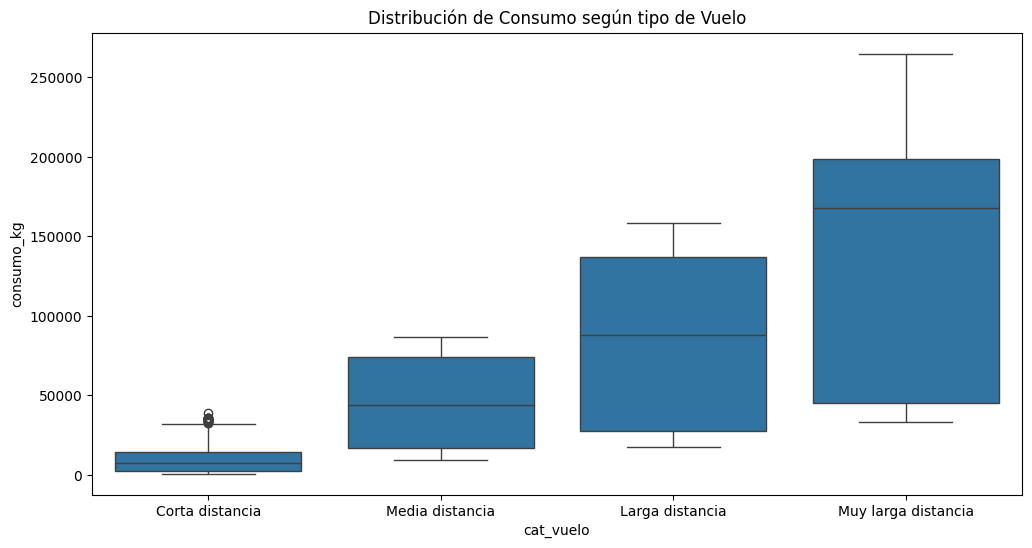

In [64]:
# Gráfico de ingresos por tipo de vuelo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='cat_vuelo', y='ingresos')
plt.title('Distribución de Ingresos según tipo de Vuelo')
plt.show()

# Gráfico de consumo por tipo de vuelo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='cat_vuelo', y='consumo_kg')
plt.title('Distribución de Consumo según tipo de Vuelo')
plt.show()

In [66]:
df_air_jun.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].describe()

/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_48029/4180426123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_air_jun.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].describe()


ingresos                                           \
                       count           mean            std        min   
cat_vuelo                                                               
Corta distancia        170.0   69372.754471   53409.835804   11797.85   
Media distancia        131.0  305331.327023   78883.657193  134820.81   
Larga distancia        157.0  524261.032994  176953.417649  235350.43   
Muy larga distancia    142.0  825074.342394  220867.900577  432558.22   

                                                                       \
                             25%         50%          75%         max   
cat_vuelo                                                               
Corta distancia       26541.9725   50949.395   100790.725   202491.15   
Media distancia      234733.6950  277928.680   378813.650   434812.46   
Larga distancia      390412.2900  461570.180   733397.670   824621.70   
Muy larga distancia  612803.0150  848798.055  1002533.785  1295515.83   

                    consumo_kg                                             \
                         count           mean           std           min   
cat_vuelo                                                                   
Corta distancia          170.0   10325.614191  10718.645953    835.920000   
Media distancia          131.0   44962.786199  28693.776755   9583.920000   
Larga distancia          157.0   84527.926838  50431.592540  17781.403500   
Muy larga distancia      142.0  141041.890049  73698.713898  33157.217808   

                                                                               
                              25%            50%            75%           max  
cat_vuelo                                                                      
Corta distancia       2303.463475    7191.913050   14438.506100   39076.26800  
Media distancia      16860.183548   44145.192000   74326.461300   86652.95080  
Larga distancia      27357.200832   87710.480000  137282.891200  158172.82120  
Muy larga distancia  45277.618464  167982.764768  198492.511776  264876.31456

Ingresos por vuelo y distancia: Los ingresos de las aerolíneas tienden a aumentar con la distancia del vuelo. Esto refleja que los vuelos de larga distancia y muy larga distancia suelen ser más caros, lo que contribuye a mayores ingresos para la aerolínea.

Consumo de recursos y distancia: El consumo de recursos sigue una tendencia similar. A medida que la distancia del vuelo aumenta, también lo hace el consumo de combustible y otros recursos para operar el vuelo.

Rentabilidad y gestión de recursos: Las aerolíneas podrían estar enfrentando mayores costos operativos en los vuelos de larga y muy larga distancia debido al mayor consumo de recursos. Sin embargo, también hay un potencial de mayores ganancias debido a las tarifas más altas de esos vuelos.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [67]:
df_air_jun['ingreso_por_kg'] = df_air_jun['ingresos'] / df_air_jun['consumo_kg']  # Ingreso por kilogramo consumido
df_air_jun['kg_por_km'] = df_air_jun['consumo_kg'] / df_air_jun['distancia']  # Kilogramos consumidos por kilómetro

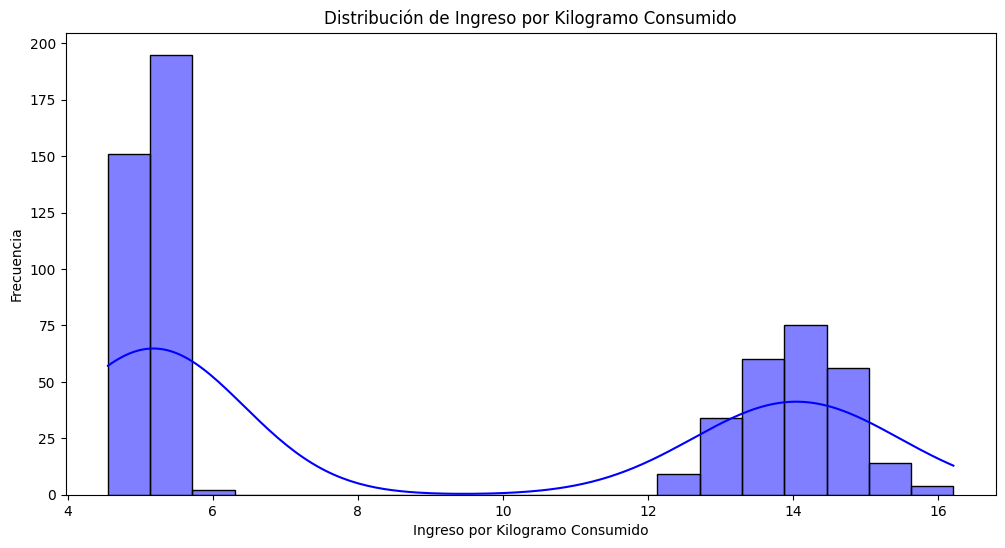

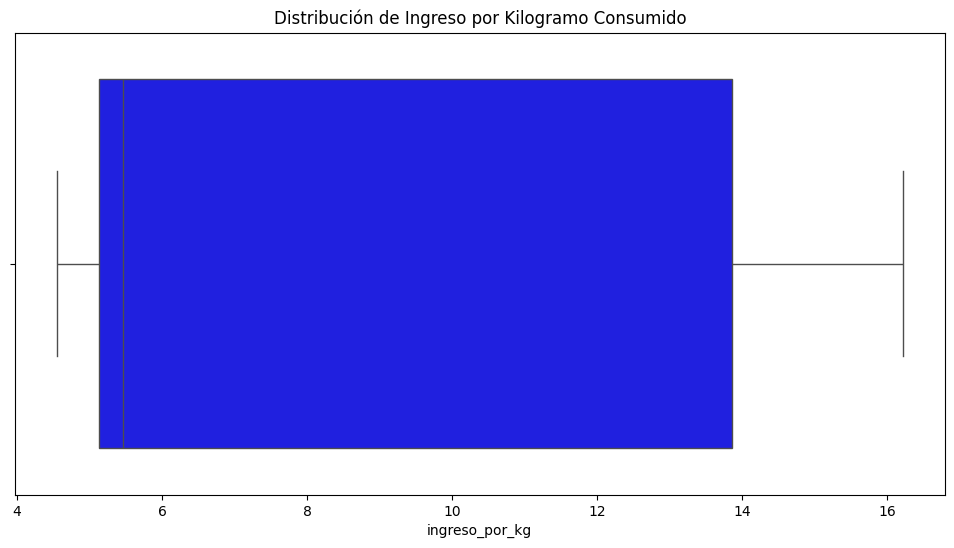

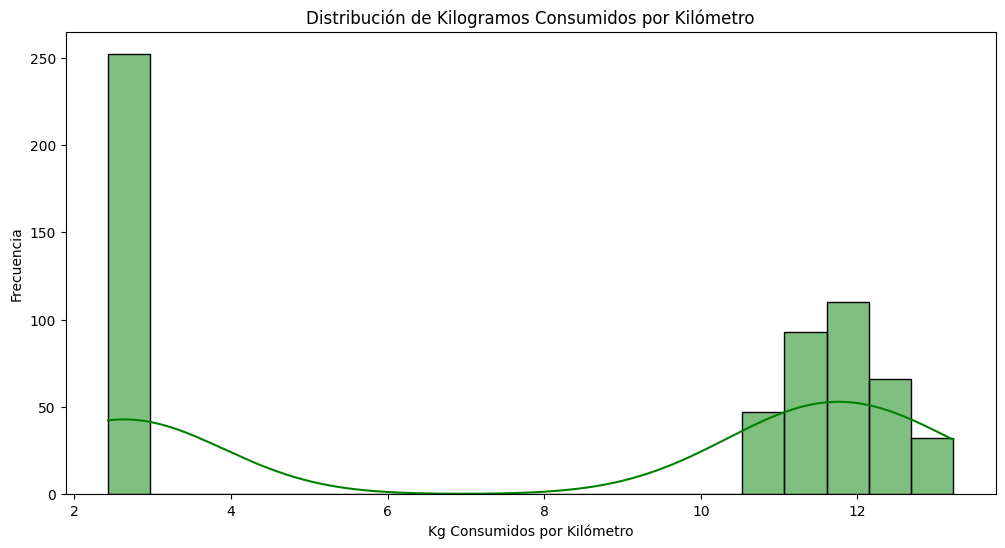

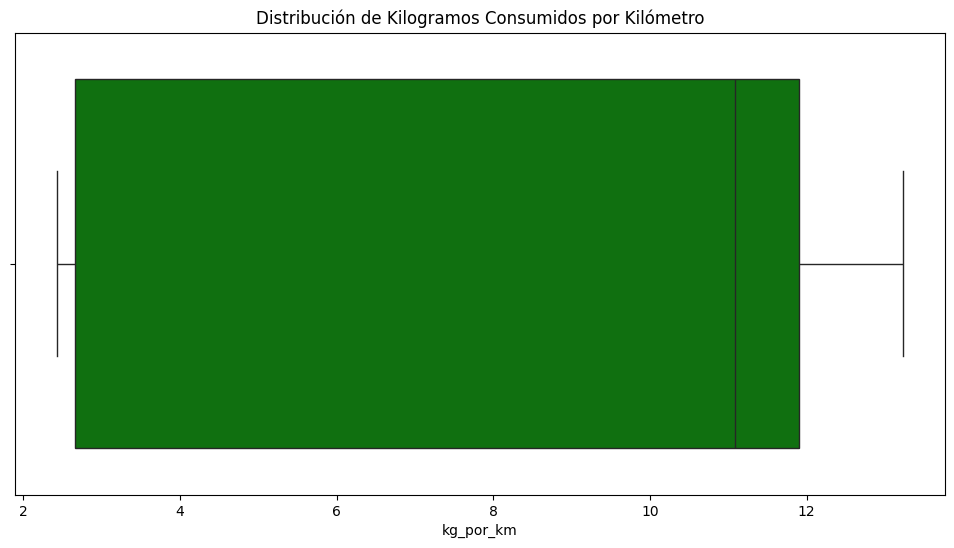

In [68]:
# Histograma para "Ingreso por kg consumido"
plt.figure(figsize=(12, 6))
sns.histplot(df_air_jun['ingreso_por_kg'], bins=20, kde=True, color='blue')
plt.title('Distribución de Ingreso por Kilogramo Consumido')
plt.xlabel('Ingreso por Kilogramo Consumido')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para "Ingreso por kg consumido"
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='ingreso_por_kg', color='blue')
plt.title('Distribución de Ingreso por Kilogramo Consumido')
plt.show()

# Histograma para "Kg consumidos por km"
plt.figure(figsize=(12, 6))
sns.histplot(df_air_jun['kg_por_km'], bins=20, kde=True, color='green')
plt.title('Distribución de Kilogramos Consumidos por Kilómetro')
plt.xlabel('Kg Consumidos por Kilómetro')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para "Kg consumidos por km"
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_air_jun, x='kg_por_km', color='green')
plt.title('Distribución de Kilogramos Consumidos por Kilómetro')
plt.show()

In [73]:
# Calcular percentiles para determinar los umbrales
umbral_ingreso_kg = df_air_jun['ingreso_por_kg'].quantile(0.75)  # Percentil 75
umbral_kg_km = df_air_jun['kg_por_km'].quantile(0.25)  # Percentil 25

# Crear variable binaria de eficiencia
df_air_jun['eficiencia'] = df_air_jun.apply(
    lambda row: 'Supereficiente' if (row['ingreso_por_kg'] > umbral_ingreso_kg) and (row['kg_por_km'] < umbral_kg_km) else 'No eficiente',
    axis=1
)

# Mostrar los resultados
df_air_jun['eficiencia'].value_counts()

eficiencia
No eficiente      513
Supereficiente     87
Name: count, dtype: int64

In [74]:
# Ver los vuelos supereficientes
df_supereficientes = df_air_jun[df_air_jun['eficiencia'] == 'Supereficiente']

# Resumen de los vuelos supereficientes
df_supereficientes[['ingresos', 'consumo_kg', 'distancia', 'ingreso_por_kg', 'kg_por_km']].describe()

,ingresos,consumo_kg,distancia,ingreso_por_kg,kg_por_km
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,212152.044943,14734.991163,5770.000000,14.527944,2.544923
std,177526.071645,12523.706711,4857.109527,0.524008,0.067883
min,11797.850000,835.920000,344.000000,13.865258,2.430000
25%,33160.605000,2207.863700,885.000000,14.111071,2.502900
50%,222490.710000,15231.684000,6206.000000,14.461455,2.551500
75%,301794.360000,20823.041000,8132.500000,14.739526,2.610400
max,719577.550000,51629.634576,20029.000000,16.213469,2.660600


Vuelos supereficientes: Aquellos que están en el percentil superior de ingresos por kilogramo y en el percentil inferior de consumo de recursos por kilómetro.

Vuelos no eficientes: Aquellos que no cumplen con los criterios definidos por los percentiles.

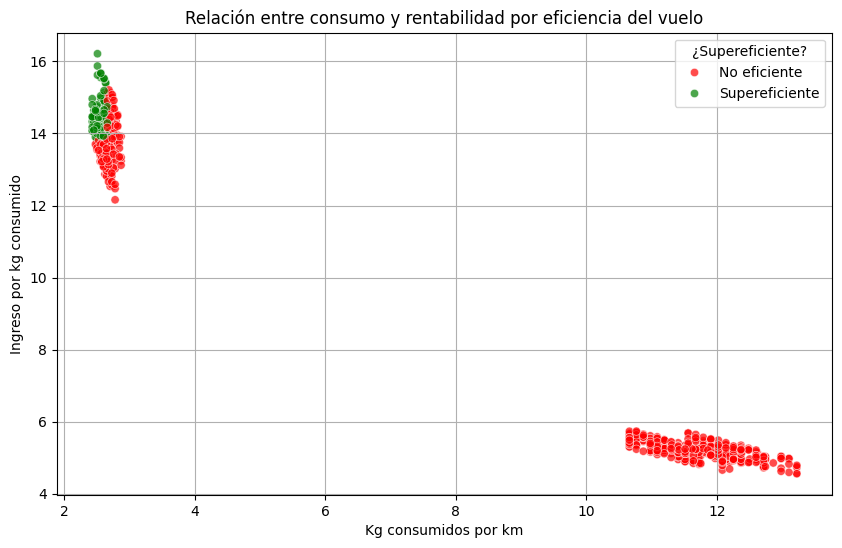

In [77]:
# Scatter plot: ingreso por kg vs kg por km
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_air_jun,
    x='kg_por_km',
    y='ingreso_por_kg',
    hue='eficiencia',
    palette={'Supereficiente': 'green', 'No eficiente': 'red'},
    alpha=0.7
)
plt.title('Relación entre consumo y rentabilidad por eficiencia del vuelo')
plt.xlabel('Kg consumidos por km')
plt.ylabel('Ingreso por kg consumido')
plt.legend(title='¿Supereficiente?')
plt.grid(True)
plt.show()


In [79]:
# Tabla cruzada: conteo
tabla_eficiencia = pd.crosstab(df_air_jun['eficiencia'], df_air_jun['aircompany'], normalize='columns') * 100

# Redondear para facilitar lectura
tabla_eficiencia = tabla_eficiencia.round(2)

# Mostrar
print(tabla_eficiencia)

aircompany      Airnar   FlyQ  MoldaviAir  PamPangea  TabarAir
eficiencia                                                    
No eficiente      92.0  86.11       90.23      78.63     81.69
Supereficiente     8.0  13.89        9.77      21.37     18.31


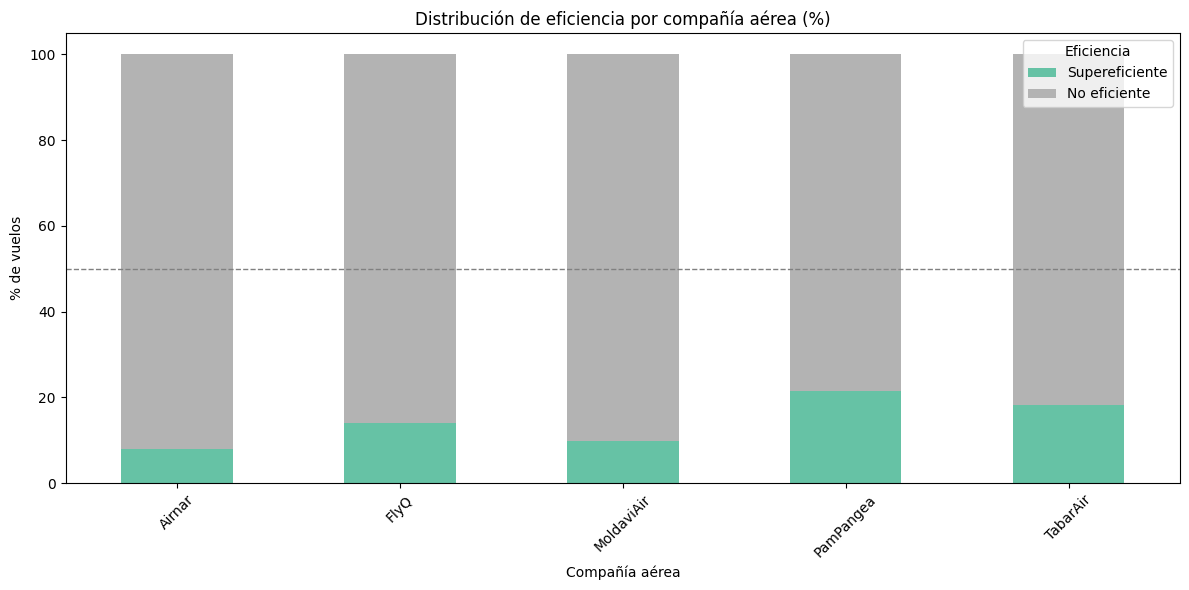

In [81]:
df_plot = pd.crosstab(df_air_jun['aircompany'], df_air_jun['eficiencia'], normalize='index') * 100
df_plot = df_plot[['Supereficiente', 'No eficiente']]  # Asegurar el orden

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Distribución de eficiencia por compañía aérea (%)')
plt.ylabel('% de vuelos')
plt.xlabel('Compañía aérea')
plt.axhline(50, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Eficiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
# Filtrar solo TabarAir
tabar_data = df_air_jun[df_air_jun['aircompany'] == 'TabarAir']
tabar_summary = tabar_data['eficiencia'].value_counts(normalize=True) * 100
print("Distribución de eficiencia en TabarAir (%):\n", tabar_summary.round(2))

Distribución de eficiencia en TabarAir (%):
 eficiencia
No eficiente      81.69
Supereficiente    18.31
Name: proportion, dtype: float64


TabarAir no es la peor, ni de cerca: tiene un 18.31% de vuelos supereficientes. De hecho, está por encima de la media del grupo, lo que indica que su problema no está en la eficiencia técnica o operativa (consumo vs ingreso).Aerolíneas como Airnar o MoldaviAir deberían preocuparse más por su eficiencia

In [88]:
tabar_supereficientes = df_air_jun[
    (df_air_jun['aircompany'] == 'TabarAir') &
    (df_air_jun['eficiencia'] == 'Supereficiente')]

In [89]:
origenes = tabar_supereficientes['origen'].value_counts()
print("Orígenes con más vuelos supereficientes de TabarAir:")
print(origenes)

Orígenes con más vuelos supereficientes de TabarAir:
origen
Ginebra        9
Londres        5
Roma           5
Nueva York     3
Los Angeles    2
Cincinnati     2
Name: count, dtype: int64


In [90]:
destinos = tabar_supereficientes['destino'].value_counts()
print("Destinos con más vuelos supereficientes de TabarAir:")
print(destinos)

Destinos con más vuelos supereficientes de TabarAir:
destino
Roma           8
Los Angeles    5
Cincinnati     4
Ginebra        3
Nueva York     3
Londres        3
Name: count, dtype: int64


/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_48029/1950886921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tabar_supereficientes, y='destino', order=tabar_supereficientes['destino'].value_counts().index, palette='viridis')


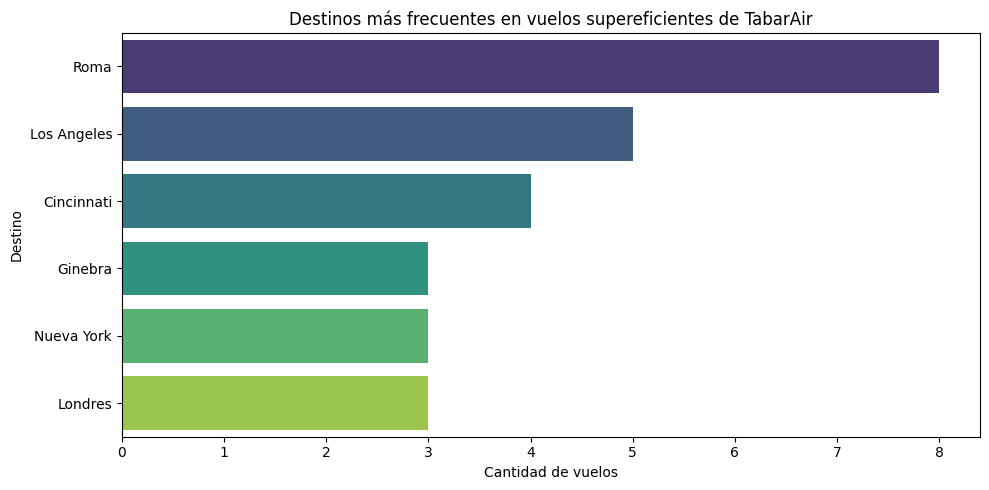

In [91]:
# Gráfico de los destinos
plt.figure(figsize=(10, 5))
sns.countplot(data=tabar_supereficientes, y='destino', order=tabar_supereficientes['destino'].value_counts().index, palette='viridis')
plt.title('Destinos más frecuentes en vuelos supereficientes de TabarAir')
plt.xlabel('Cantidad de vuelos')
plt.ylabel('Destino')
plt.tight_layout()
plt.show()

In [94]:
tabar_air = df_air_jun[
    (df_air_jun['aircompany'] == 'TabarAir')]

In [95]:
origenes2 = tabar_air['origen'].value_counts()
print("Orígenes con más vuelos supereficientes de TabarAir:")
print(origenes)

Orígenes con más vuelos supereficientes de TabarAir:
origen
Ginebra        9
Londres        5
Roma           5
Nueva York     3
Los Angeles    2
Cincinnati     2
Name: count, dtype: int64


/var/folders/tb/bzmqvp956c176vyy0ydx7kl00000gn/T/ipykernel_48029/1258764954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tabar_air, y='destino', order=tabar_air['destino'].value_counts().index, palette='viridis')


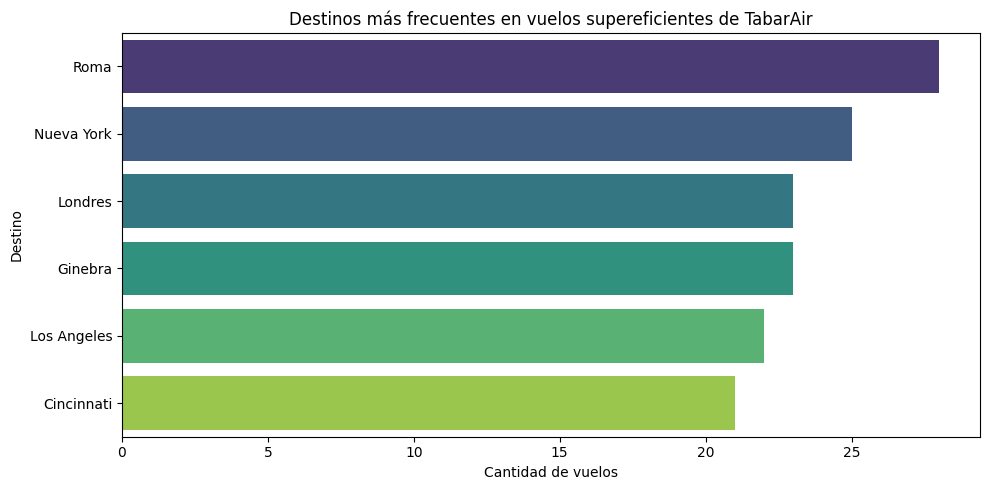

In [96]:
# Gráfico de los destinos
plt.figure(figsize=(10, 5))
sns.countplot(data=tabar_air, y='destino', order=tabar_air['destino'].value_counts().index, palette='viridis')
plt.title('Destinos más frecuentes en vuelos supereficientes de TabarAir')
plt.xlabel('Cantidad de vuelos')
plt.ylabel('Destino')
plt.tight_layout()
plt.show()

In [115]:
destinos_clave = ['Roma', 'Los Angeles', 'Cincinnati']

vuelos_tabar_destinos = df_air_jun[
    (df_air_jun['aircompany'] == 'TabarAir')]

vuelos_tabar_destinos

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ingreso_por_kg,kg_por_km,es_supereficiente,eficiencia
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.9072,626,584789.19,Tab_GiLo_11380,Jun23,Larga distancia,5.343473,12.0224,False,No eficiente
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.7440,518,438535.07,Tab_CiRo_10747,Jun23,Larga distancia,5.092391,11.5128,False,No eficiente
10,TabarAir,Los Angeles,Cincinnati,3073,Boeing 737,False,7915.4334,253,111056.67,Tab_LoCi_10737,Jun23,Corta distancia,14.030397,2.5758,True,Supereficiente
12,TabarAir,Cincinnati,Los Angeles,3073,Boeing 747,False,32758.1800,224,184079.01,Tab_CiLo_10747,Jun23,Corta distancia,5.619330,10.6600,False,No eficiente
13,TabarAir,Ginebra,Londres,739,Airbus A380,False,8542.8400,69,46200.30,Tab_GiLo_11380,Jun23,Corta distancia,5.408073,11.5600,False,No eficiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,TabarAir,Roma,Cincinnati,7480,Boeing 737,False,18358.1640,588,258737.92,Tab_RoCi_10737,Jun23,Larga distancia,14.093889,2.4543,True,Supereficiente
582,TabarAir,Ginebra,Cincinnati,6969,Airbus A380,False,85395.3384,484,423371.06,Tab_GiCi_11380,Jun23,Larga distancia,4.957777,12.2536,False,No eficiente
587,TabarAir,Cincinnati,Londres,6284,Airbus A380,False,77728.0528,438,404542.35,Tab_CiLo_11380,Jun23,Media distancia,5.204586,12.3692,False,No eficiente
593,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,108387.6004,626,550268.31,Tab_GiLo_11380,Jun23,Larga distancia,5.076857,11.9068,False,No eficiente


In [116]:
vuelos_tabar_destinos.groupby(['destino', 'eficiencia','avion'])[['ingreso_por_kg', 'kg_por_km']].mean().round(2)

ingreso_por_kg  kg_por_km
destino     eficiencia     avion                                 
Cincinnati  No eficiente   Airbus A320           14.39       2.72
                           Airbus A380            5.23      12.05
                           Boeing 737            13.52       2.55
                           Boeing 747             5.22      11.35
            Supereficiente Boeing 737            13.99       2.53
Ginebra     No eficiente   Airbus A320           13.98       2.81
                           Airbus A380            5.23      12.16
                           Boeing 737            13.75       2.56
                           Boeing 747             5.39      11.17
            Supereficiente Airbus A320           15.62       2.51
                           Boeing 737            14.26       2.53
Londres     No eficiente   Airbus A320           14.23       2.77
                           Airbus A380            5.15      12.00
                           Boeing 747             5.12      11.42
            Supereficiente Airbus A320           14.29       2.66
                           Boeing 737            14.45       2.54
Los Angeles No eficiente   Airbus A320           14.23       2.74
                           Airbus A380            5.12      12.14
                           Boeing 737            13.55       2.56
                           Boeing 747             5.37      11.10
            Supereficiente Airbus A320           14.95       2.62
                           Boeing 737            14.39       2.45
Nueva York  No eficiente   Airbus A320           14.69       2.73
                           Airbus A380            5.16      12.45
                           Boeing 737            13.29       2.65
                           Boeing 747             5.10      11.32
            Supereficiente Airbus A320           15.42       2.64
                           Boeing 737            14.28       2.52
Roma        No eficiente   Airbus A320           14.12       2.79
                           Airbus A380            5.37      11.79
                           Boeing 737            13.02       2.67
                           Boeing 747             5.33      11.17
            Supereficiente Airbus A320           15.03       2.61
                           Boeing 737            14.09       2.49

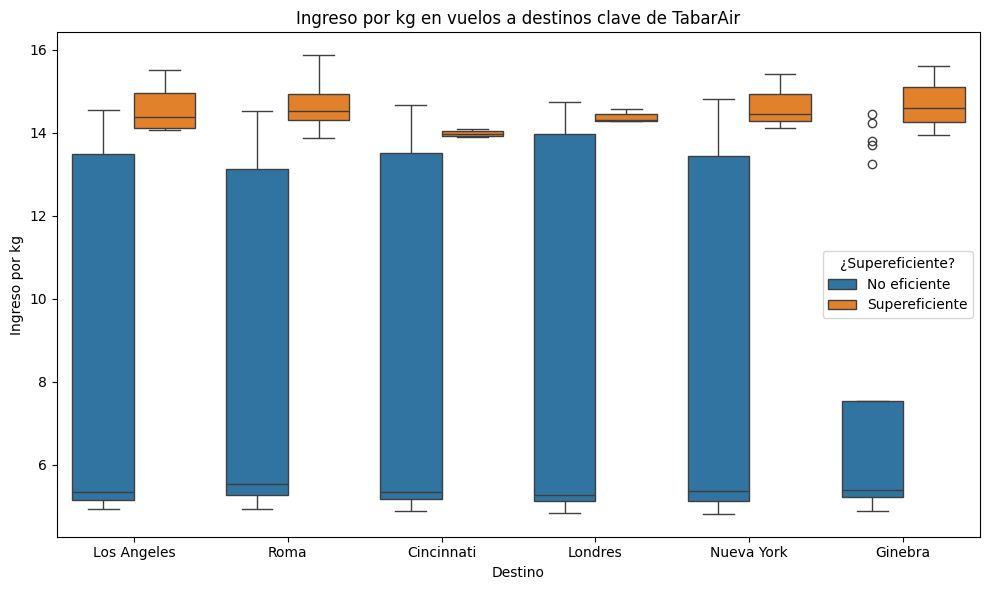

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vuelos_tabar_destinos, x='destino', y='ingreso_por_kg', hue='eficiencia')
plt.title('Ingreso por kg en vuelos a destinos clave de TabarAir')
plt.ylabel('Ingreso por kg')
plt.xlabel('Destino')
plt.legend(title='¿Supereficiente?')
plt.tight_layout()
plt.show()

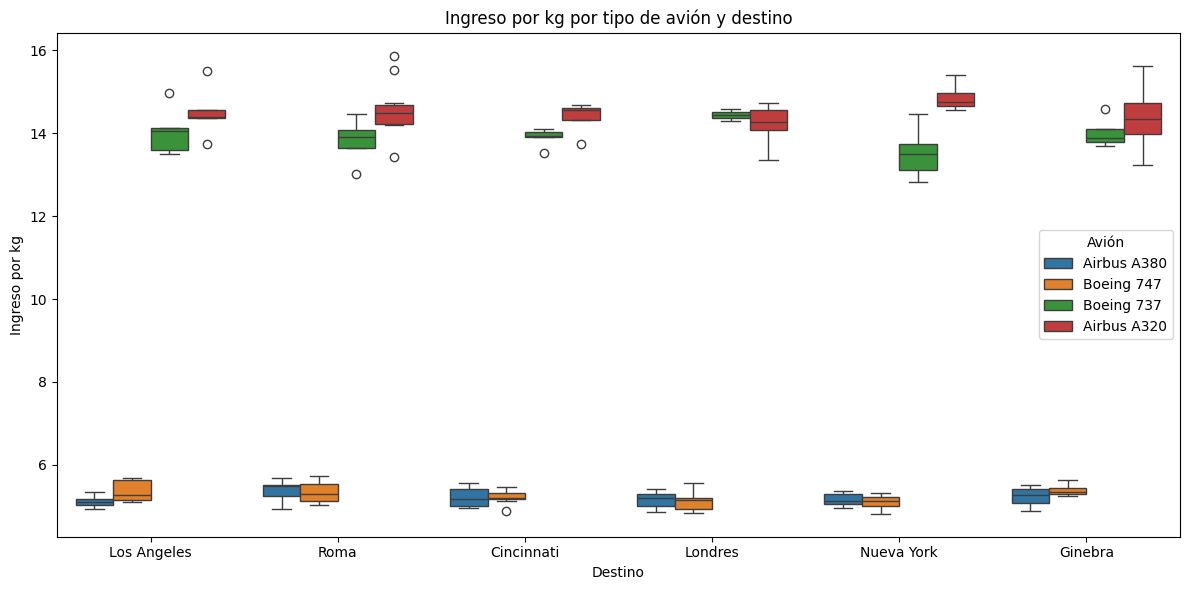

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vuelos_tabar_destinos, x='destino', y='ingreso_por_kg', hue='avion')
plt.title('Ingreso por kg por tipo de avión y destino')
plt.ylabel('Ingreso por kg')
plt.xlabel('Destino')
plt.legend(title='Avión')
plt.tight_layout()
plt.show()


Observando las métricas de ingreso por kg y consumo por km por destino y tipo de avión, podemos hacer las siguientes observaciones:

Aviones más eficientes:
Boeing 737 muestra consistentemente altos ingresos por kg (por encima de 13) y bajo consumo de combustible por kilómetro (alrededor de 2.5). Esto lo convierte en el avión más eficiente para la mayoría de los destinos, especialmente cuando los vuelos son supereficientes.

Aviones menos eficientes:
Airbus A380 y Boeing 747 tienen ingresos más bajos por kg y un consumo de combustible significativamente más alto. Esto sugiere que estos aviones son más grandes y pesados, lo que resulta en una menor eficiencia en términos de consumo de combustible, especialmente en vuelos más cortos.

Airbus A320 se encuentra entre los aviones con buenos ingresos por kg (alrededor de 14), pero con un consumo de combustible más alto en comparación con el Boeing 737, lo que lo hace menos eficiente en vuelos largos.

CONCLUSION: Para todos los destinos mencionados (Cincinnati, Ginebra, Londres, Los Angeles, Nueva York y Roma), el avión más eficiente y más recomendado es el Boeing 737, debido a su alto ingreso por kg y bajo consumo por km.